In [77]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np

# Method to get Meta-Data about any dataframe passed 
def get_meta_data(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # data types of columns
                    'Total_Element': dataframe.count(), # total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # total null values in columns
                    'Null_Percentage': round(dataframe.isnull().sum()/len(dataframe) * 100,2) ,# percentage of null values
                    'Unique_Value': dataframe.nunique()
                       })
    return metadata_matrix

In [78]:
db_data = pd.read_csv("pima_indian_diabetes.csv")
db_data.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [79]:
db_data_metadata=get_meta_data(db_data)

In [80]:
db_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
90%,8.000000,170.900000,86.000000,43.000000,292.800000,42.070000,46.000000,1.000000
95%,10.000000,181.000000,90.000000,46.450000,396.500000,45.245000,52.450000,1.000000
99%,13.000000,196.000000,102.360000,52.000000,580.890000,53.362000,60.000000,1.000000


In [81]:
from sklearn.model_selection import train_test_split
X = db_data.drop(['Diabetes'], axis=1)
X.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,1,89,66,23,94,28.1,21
1,0,137,40,35,168,43.1,33
2,3,78,50,32,88,31.0,26
3,2,197,70,45,543,30.5,53
4,1,189,60,23,846,30.1,59


In [82]:
y = db_data['Diabetes']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Diabetes, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
col=X_train.columns.tolist()

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_train.describe(percentiles=[0.5])

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
count,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02
mean,3.889832e-17,-5.186443e-17,-3.533265e-16,-1.004873e-16,6.483054e-18,6.158901e-16,-5.267482e-17
std,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00
min,-1.011151e+00,-2.157727e+00,-3.313046e+00,-2.077303e+00,-1.190826e+00,-2.108294e+00,-9.381786e-01
50%,-3.829077e-01,-1.132279e-01,1.770420e-03,-1.033313e-03,-2.770080e-01,-1.120457e-03,-4.309550e-01
max,4.328920e+00,2.385604e+00,3.154889e+00,2.924620e+00,5.619783e+00,4.715598e+00,3.322500e+00


In [85]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg = LogisticRegression()
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Sat, 08 May 2021   Deviance:                       244.22
Time:                        01:55:39   Pearson chi2:                     264.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9713      0.170     -5.719      0.000      -1.304      -0.638
No_Times_Pregnant     0.2917      0.210      1.386      0.166      -0.121       0.704
Plasma_Glucose        1.2614      0.216      5.851      0.000       0.839       1.684
Diastolic_BP         -0.0746      0.174     -0.429      0.668      -0.415       0.266
Triceps               0.1371      0.205      0.668      0.504      -0.265       0.539
Insulin              -0.1305      0.179     -0.728      0.467      -0.482       0.221
BMI                   0.4634      0.215      2.151      0.031       0.041       0.886
Age                   0.3631      0.224      1.624      0.104      -0.075       0.801
=====================================================================================
"""

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_
col = X_train.columns[rfe.support_]
X_train=X_train[col]

In [87]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.44
Date:                Sat, 08 May 2021   Deviance:                       244.88
Time:                        01:55:39   Pearson chi2:                     263.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9737      0.170     -5.739      0.000      -1.306      -0.641
No_Times_Pregnant     0.3015      0.208      1.451      0.147      -0.106       0.709
Plasma_Glucose        1.1770      0.183      6.446      0.000       0.819       1.535
Triceps               0.1448      0.205      0.708      0.479      -0.256       0.546
BMI                   0.4156      0.205      2.025      0.043       0.013       0.818
Age                   0.3269      0.215      1.522      0.128      -0.094       0.748
=====================================================================================
"""

In [88]:
X_train = X_train.drop(['Triceps'], axis=1)

In [89]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.69
Date:                Sat, 08 May 2021   Deviance:                       245.38
Time:                        01:55:40   Pearson chi2:                     266.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9638      0.168     -5.728      0.000      -1.294      -0.634
No_Times_Pregnant     0.2993      0.208      1.438      0.150      -0.109       0.707
Plasma_Glucose        1.1752      0.182      6.462      0.000       0.819       1.532
BMI                   0.5041      0.164      3.069      0.002       0.182       0.826
Age                   0.3494      0.213      1.639      0.101      -0.068       0.767
=====================================================================================
"""

In [90]:
X_train = X_train.drop(['No_Times_Pregnant'], axis=1)

In [91]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      270
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.74
Date:                Sat, 08 May 2021   Deviance:                       247.48
Time:                        01:55:40   Pearson chi2:                     283.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9510      0.167     -5.698      0.000      -1.278      -0.624
Plasma_Glucose     1.1606      0.181      6.415      0.000       0.806       1.515
BMI                0.4848      0.163      2.972      0.003       0.165       0.805
Age                0.5603      0.161      3.487      0.000       0.245       0.875
==================================================================================
"""

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Plasma_Glucose,1.17
2,Age,1.13
1,BMI,1.04


In [94]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [95]:
y_train_pred[:10]

array([0.59321904, 0.51445708, 0.32086795, 0.71436815, 0.41225259,
       0.87683847, 0.23576476, 0.9545353 , 0.30100225, 0.0955183 ])

In [96]:
y_train_pred_final = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Diabetes,Diabetes_Prob,ID
0,1,0.593219,169
1,0,0.514457,265
2,0,0.320868,386
3,0,0.714368,241
4,0,0.412253,249


In [97]:
from sklearn import metrics
y_train_pred_final['predicted'] = y_train_pred_final.Diabetes_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Diabetes,Diabetes_Prob,ID,predicted
0,1,0.593219,169,1
1,0,0.514457,265,1
2,0,0.320868,386,0
3,0,0.714368,241,1
4,0,0.412253,249,0


In [98]:
print(metrics.accuracy_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))

0.791970802919708


In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Diabetes, y_train_pred_final.Diabetes_Prob,
                                         drop_intermediate = False )

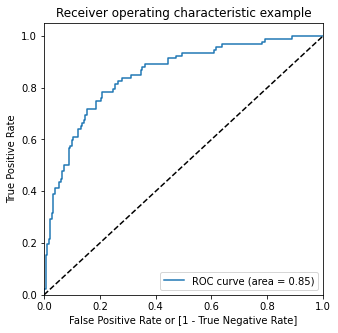

In [101]:
draw_roc(y_train_pred_final.Diabetes, y_train_pred_final.Diabetes_Prob)

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Diabetes_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Diabetes,Diabetes_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.593219,169,1,1,1,1,1,1,1,0,0,0,0
1,0,0.514457,265,1,1,1,1,1,1,1,0,0,0,0
2,0,0.320868,386,0,1,1,1,1,0,0,0,0,0,0
3,0,0.714368,241,1,1,1,1,1,1,1,1,1,0,0
4,0,0.412253,249,0,1,1,1,1,1,0,0,0,0,0


In [103]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Diabetes, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.335766  1.000000  0.000000
0.1   0.1  0.551095  0.967391  0.340659
0.2   0.2  0.718978  0.891304  0.631868
0.3   0.3  0.773723  0.782609  0.769231
0.4   0.4  0.799270  0.695652  0.851648
0.5   0.5  0.791971  0.619565  0.879121
0.6   0.6  0.777372  0.510870  0.912088
0.7   0.7  0.766423  0.413043  0.945055
0.8   0.8  0.726277  0.228261  0.978022
0.9   0.9  0.689781  0.086957  0.994505


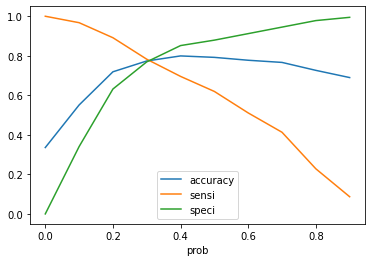

In [104]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Diabetes_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Diabetes,Diabetes_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.593219,169,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.514457,265,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.320868,386,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.714368,241,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.412253,249,0,1,1,1,1,1,0,0,0,0,0,1


In [106]:
print(metrics.accuracy_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))

0.791970802919708


In [107]:
print(metrics.accuracy_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))
print(metrics.precision_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))
print(metrics.recall_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))
print(metrics.f1_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))

0.791970802919708
0.7215189873417721
0.6195652173913043
0.6666666666666666


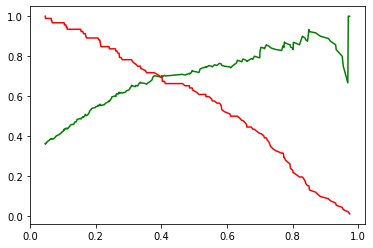

In [108]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Diabetes, y_train_pred_final.Diabetes_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [110]:
test_col = X_test.columns
test_col

Index(['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps',
       'Insulin', 'BMI', 'Age'],
      dtype='object')

In [112]:
X_test[test_col]= scaler.transform(X_test[test_col])

In [113]:
col = X_train.columns
X_test = X_test[col]
X_test.head()

,Plasma_Glucose,BMI,Age
124,1.055057,-0.001120,2.105163
140,-0.502656,0.459388,-0.532400
276,-0.729823,0.850122,1.293605
252,0.081486,-0.615131,1.496495
326,-0.729823,-1.926881,-0.228066


In [115]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [118]:
y_test_df = pd.DataFrame(y_test)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df['ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Diabetes,ID,0
0,1,124,0.810381
1,1,140,0.166590
2,1,276,0.340488
3,1,252,0.421603
4,0,326,0.054164


In [121]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Diabetes_Prob'})

In [123]:
y_pred_final = y_pred_final.reindex(['ID','Diabetes','Diabetes_Prob'], axis=1)

In [124]:
y_pred_final.head()

,ID,Diabetes,Diabetes_Prob
0,124,1,0.810381
1,140,1,0.166590
2,276,1,0.340488
3,252,1,0.421603
4,326,0,0.054164


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Diabetes_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [127]:
print(metrics.accuracy_score(y_pred_final.Diabetes, y_pred_final.final_predicted))
print(metrics.precision_score(y_pred_final.Diabetes, y_pred_final.final_predicted))
print(metrics.recall_score(y_pred_final.Diabetes, y_pred_final.final_predicted))
print(metrics.f1_score(y_pred_final.Diabetes, y_pred_final.final_predicted))

0.7457627118644068
0.5740740740740741
0.8157894736842105
0.6739130434782609
